In [14]:
library(psych)

setwd('/home/camachocm2/Analysis/local_moochie/Aggregate_anats/GMD_ML/doc')
data<-read.csv('subject_info.csv')
colnames(data)


[1] "X.1"                    "X"                      "freesurferID"          
 [4] "SubjectID"              "Study"                  "Sequence.Version"      
 [7] "Potentially.Usable"     "in_analysis"            "Same.Kid.as."          
[10] "Dx_Group"               "Age_yrs"                "Age_mos"               
[13] "male"                   "MAP_Temper_Loss"        "MAP_Noncompliance"     
[16] "MAP_General_Aggression" "MAP_Low_Concern"        "CT_QC"                 
[19] "DB_factor"              "anger_factor"           "gmd_usable"            
[22] "X.2"

In [15]:
library('bestNormalize')

ERROR: Error in readRDS(pfile): cannot read workspace version 3 written by R 3.6.0; need R 3.5.0 or newer


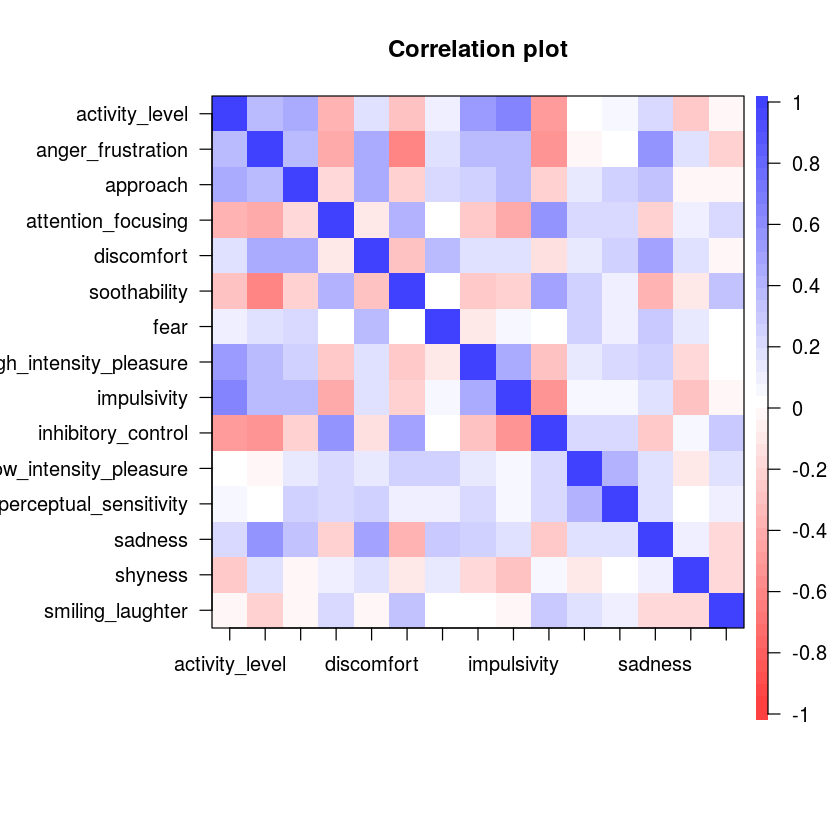

In [18]:
features<-cbind(data[,8:22])
features<-scale(features, scale=TRUE)

cor.plot(features)

cor_mtx <-cor(features, use = 'complete.obs')

Parallel analysis suggests that the number of factors =  4  and the number of components =  3 


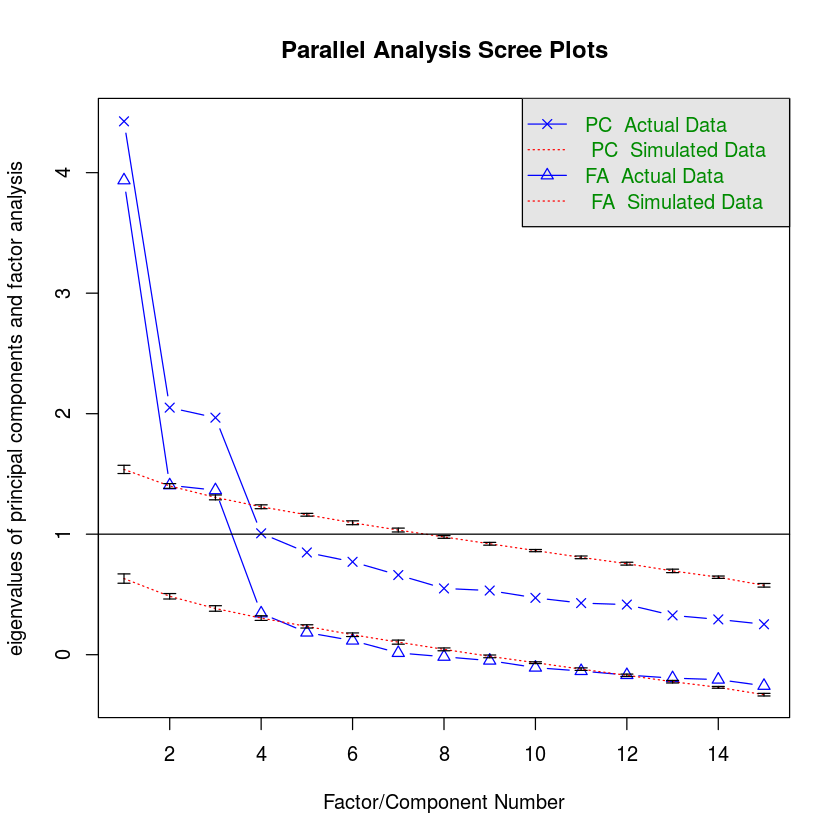

In [19]:
fa.parallel(cor_mtx, fa='both', n.obs=184,fm='ml', SMC=TRUE, error.bars=TRUE,se.bars=TRUE)

In [20]:
model <- fa(features,4,fm='ml',rotate='varimax')
model

Factor Analysis using method =  ml
Call: fa(r = features, nfactors = 4, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                          ML1   ML2   ML3   ML4   h2   u2 com
activity_level           0.74  0.19  0.05  0.06 0.59 0.41 1.1
anger_frustration        0.30  0.78 -0.02  0.19 0.73 0.27 1.4
approach                 0.37  0.27  0.26  0.31 0.37 0.63 3.7
attention_focusing      -0.47 -0.37  0.30 -0.02 0.45 0.55 2.6
discomfort               0.06  0.46  0.28  0.47 0.52 0.48 2.7
soothability            -0.20 -0.74  0.15  0.02 0.62 0.38 1.2
fear                    -0.03  0.07  0.11  0.64 0.43 0.57 1.1
high_intensity_pleasure  0.56  0.28  0.32 -0.22 0.54 0.46 2.5
impulsivity              0.82  0.09 -0.01  0.10 0.69 0.31 1.1
inhibitory_control      -0.59 -0.44  0.38 -0.07 0.68 0.32 2.6
low_intensity_pleasure   0.05 -0.14  0.53  0.22 0.35 0.65 1.5
perceptual_sensitivity   0.01  0.02  0.63  0.08 0.40 0.60 1.0
sadness               

In [37]:
scores<-factor.scores(features, model)
factor_scores<-scores$scores
data$factor1<-factor_scores[,1]
data$factor2<-factor_scores[,2]
data$factor3<-factor_scores[,3]
data$factor4<-factor_scores[,4]
#write.csv(data, 'subject_info.csv')